In [32]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option("display.max_columns", None)
from pathlib import Path

df = pd.read_csv(r"C:\Users\utkar\Desktop\ProjectX\ProjectX\Notebook\Telco_Customer_Churn.csv")



# Print shape of dataset
print(df.shape)

(7043, 21)


In [33]:
##these are the features with nan value
features_with_na=[features for features in df.columns if df[features].isnull().sum()>=1]
for feature in features_with_na:
    print(feature,np.round(df[feature].isnull().mean()*100,5), '% missing values')

In [34]:
features_with_na

[]

In [35]:

df.duplicated().sum()

np.int64(0)

In [36]:
df.columns.tolist()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [37]:
# To drop multiple columns in-place
df.drop(['customerID', 'PhoneService','gender','TotalCharges','StreamingMovies'], inplace=True, axis=1)

In [38]:

df.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,Yes,No,1,No phone service,DSL,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,0,No,No,34,No,DSL,Yes,No,Yes,No,No,One year,No,Mailed check,56.95,No
2,0,No,No,2,No,DSL,Yes,Yes,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes
3,0,No,No,45,No phone service,DSL,Yes,No,Yes,Yes,No,One year,No,Bank transfer (automatic),42.30,No
4,0,No,No,2,No,Fiber optic,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes


In [39]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')

In [40]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features))

Num of Numerical Features : 2


In [41]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', cat_features)

Num of Categorical Features : ['SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [42]:
discrete_features=[feature for feature in num_features if len(df[feature].unique())<=25]
print('Num of Discrete Features :',len(discrete_features))

Num of Discrete Features : 0


In [43]:

continuous_features=[feature for feature in num_features if feature not in discrete_features]
print('Num of Continuous Features :',len(continuous_features))

Num of Continuous Features : 2


In [44]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [45]:
y.head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

In [46]:
# If the target column has No it is encoded as 1 others as 0
y= np.where(y=='No', 1,0)

In [47]:
y

array([1, 1, 0, ..., 1, 0, 1], shape=(7043,))

In [48]:
X.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,0,Yes,No,1,No phone service,DSL,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,29.85
1,0,No,No,34,No,DSL,Yes,No,Yes,No,No,One year,No,Mailed check,56.95
2,0,No,No,2,No,DSL,Yes,Yes,No,No,No,Month-to-month,Yes,Mailed check,53.85
3,0,No,No,45,No phone service,DSL,Yes,No,Yes,Yes,No,One year,No,Bank transfer (automatic),42.30
4,0,No,No,2,No,Fiber optic,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70


In [49]:
for features in cat_features:
    print(features,':',df[features].unique())

SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [50]:
df['SeniorCitizen'].unique()

array([0, 1], dtype=object)

In [51]:
num_features = list(X.select_dtypes(exclude="object").columns)

In [52]:
num_features

['tenure', 'MonthlyCharges']

In [53]:
df.columns.tolist()

['SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'Churn']

In [54]:
# Assuming you have your dataframe 'df' loaded
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline

# Define column lists
or_columns = ['Contract', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'Partner',
 'Dependents','PaperlessBilling','TechSupport', 'StreamingTV']
oh_columns = ['MultipleLines', 'InternetService', 'PaymentMethod']
num_features = ['tenure', 'SeniorCitizen','MonthlyCharges']  # SeniorCitizen is already 0/1

 


# Create transformers
numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first', sparse_output=False)
ordinal_encoder = OrdinalEncoder()

# Create ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("OneHotEncoder", oh_transformer, oh_columns),
        ("Ordinal_Encoder", ordinal_encoder, or_columns),
        ("StandardScaler", numeric_transformer, num_features)
    ],
    remainder='drop'  # or 'passthrough' if you want to keep other columns
)



In [55]:
X = preprocessor.fit_transform(X)

In [56]:
X

array([[ 1.        ,  0.        ,  0.        , ..., -1.27744458,
        -0.43991649, -1.16032292],
       [ 0.        ,  0.        ,  0.        , ...,  0.06632742,
        -0.43991649, -0.25962894],
       [ 0.        ,  0.        ,  0.        , ..., -1.23672422,
        -0.43991649, -0.36266036],
       ...,
       [ 1.        ,  0.        ,  0.        , ..., -0.87024095,
        -0.43991649, -1.1686319 ],
       [ 0.        ,  1.        ,  1.        , ..., -1.15528349,
         2.27315869,  0.32033821],
       [ 0.        ,  0.        ,  1.        , ...,  1.36937906,
        -0.43991649,  1.35896134]], shape=(7043, 19))

In [57]:
from sklearn.preprocessing import StandardScaler
final_scaler = StandardScaler()
X = final_scaler.fit_transform(X)

In [58]:
from imblearn.combine import SMOTETomek, SMOTEENN

# Resampling the minority class. The strategy can be changed as required.
smt = SMOTEENN(random_state=42,sampling_strategy='minority' )
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X, y)

In [59]:
from sklearn.model_selection import  train_test_split
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((4905, 19), (1227, 19))

In [60]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [64]:
def evaluate_clf(true, predicted):
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc

In [62]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(), 
     "CatBoosting Classifier": CatBoostClassifier(verbose=False),
     "Support Vector Classifier": SVC(),
    "AdaBoost Classifier": AdaBoostClassifier()

}

In [63]:
# Create a function which can evaluate models and return a report 
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    models_list = []
    accuracy_list = []
    auc= []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)


        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)
        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        accuracy_list.append(model_test_accuracy)
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        auc.append(model_test_rocauc_score)
        print('='*35)
        print('\n')
        
    report=pd.DataFrame(list(zip(models_list, accuracy_list)), columns=['Model Name', 'Accuracy']).sort_values(by=['Accuracy'], ascending=False)
        
    return report


In [65]:
base_model_report =evaluate_models(X=X_res, y=y_res, models=models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9682
- F1 score: 0.9651
- Precision: 0.9660
- Recall: 0.9643
- Roc Auc Score: 0.9679


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9340
- F1 score: 0.9266
- Precision: 0.9411
- Recall: 0.9125
- Roc Auc Score: 0.9323


Gradient Boosting
Model performance for Training set
- Accuracy: 0.9482
- F1 score: 0.9447
- Precision: 0.9538
- Recall: 0.9357
- Roc Auc Score: 0.9476
----------------------------------
Model performance for Test set
- Accuracy: 0.9348
- F1 score: 0.9281
- Precision: 0.9348
- Recall: 0.9214
- Roc Auc Score: 0.9337


Logistic Regression
Model performance for Training 

In [66]:
base_model_report

,Model Name,Accuracy
0,Random Forest,0.968215
5,XGBClassifier,0.966585
6,CatBoosting Classifier,0.964140
4,K-Neighbors Classifier,0.960065
7,Support Vector Classifier,0.935615
2,Gradient Boosting,0.934800
1,Decision Tree,0.933985
8,AdaBoost Classifier,0.915240
3,Logistic Regression,0.909535


In [69]:
#Initialize few parameter for Hyperparamter tuning
xgboost_params = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2)
}

rf_params = {
    "max_depth": [10, 12, None, 15, 20],
    "max_features": ['sqrt', 'log2', None],
    "n_estimators": [10, 50, 100, 200]
}

knn_params = {
    "algorithm": ['auto', 'ball_tree', 'kd_tree','brute'],
    "weights": ['uniform', 'distance'],
    "n_neighbors": [3, 4, 5, 7, 9],
}

cat_boost_params = {
    "depth": [3, 4, 5, 6, 7],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    
    "l2_leaf_reg": [1, 3, 5]
}

In [70]:

# Models list for Hyperparameter tuning
randomcv_models = [
    ('XGBoost', XGBClassifier(), xgboost_params),
    ("RF", RandomForestClassifier(), rf_params),
    ("KNN", KNeighborsClassifier(), knn_params),
    ("CatBoost", CatBoostClassifier(), cat_boost_params)
]

In [71]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2, 
                                   n_jobs=-1)
    random.fit(X_res, y_res)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Fitting 3 folds for each of 60 candidates, totalling 180 fits
Fitting 3 folds for each of 40 candidates, totalling 120 fits
Fitting 3 folds for each of 60 candidates, totalling 180 fits
0:	learn: 0.4515648	total: 9.62ms	remaining: 9.61s
1:	learn: 0.3275820	total: 25.2ms	remaining: 12.6s
2:	learn: 0.2716547	total: 31ms	remaining: 10.3s
3:	learn: 0.2440731	total: 36.1ms	remaining: 8.98s
4:	learn: 0.2183742	total: 40.8ms	remaining: 8.13s
5:	learn: 0.1975884	total: 45.5ms	remaining: 7.54s
6:	learn: 0.1843347	total: 50ms	remaining: 7.09s
7:	learn: 0.1740012	total: 55.2ms	remaining: 6.84s
8:	learn: 0.1658664	total: 60.1ms	remaining: 6.61s
9:	learn: 0.1601290	total: 64.7ms	remaining: 6.41s
10:	learn: 0.1548893	total: 70ms	remaining: 6.3s
11:	learn: 0.1507661	total: 74.8ms	remaining: 6.16s
12:	learn: 0.1458839	total: 79.9ms	remaining: 6.06s
13:	learn: 0.1431698	total: 85.2ms	remaining: 6s
14:	learn: 0.1391211	total: 90.7ms	remaining:

 Best Params for XGBoost -------------------
{'min_child_weight': 1, 'max_depth': 9}
---------------- Best Params for RF -------------------
{'n_estimators': 50, 'max_features': 'sqrt', 'max_depth': None}
---------------- Best Params for KNN -------------------
{'weights': 'distance', 'n_neighbors': 4, 'algorithm': 'auto'}
---------------- Best Params for CatBoost -------------------
{'learning_rate': 0.2, 'l2_leaf_reg': 1, 'depth': 7}

In [76]:
from sklearn.metrics import roc_auc_score,roc_curve
best_models = {
    "Random Forest Classifier": RandomForestClassifier(**model_param['RF']),
    "KNeighborsClassifier": KNeighborsClassifier(**model_param['KNN']),
    "XGBClassifier": XGBClassifier(**model_param['XGBoost'],n_jobs=-1),
    "CatBoostClassifier": CatBoostClassifier(**model_param['CatBoost'], verbose=False)
}
tuned_report =evaluate_models(X=X_res, y=y_res, models=best_models)

Random Forest Classifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9674
- F1 score: 0.9642
- Precision: 0.9659
- Recall: 0.9625
- Roc Auc Score: 0.9670


KNeighborsClassifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9804
- F1 score: 0.9782
- Precision: 0.9963
- Recall: 0.9607
- Roc Auc Score: 0.9789


XGBClassifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9690
- F1 score: 0.9660
- Precision: 0.9677
- Recall: 0.9643
- Roc Auc Score: 0.9686


CatBoostClassifier
Model performance 

In [77]:
tuned_report

,Model Name,Accuracy
1,KNeighborsClassifier,0.980440
3,CatBoostClassifier,0.971475
2,XGBClassifier,0.969030
0,Random Forest Classifier,0.967400


In [78]:
best_model = KNeighborsClassifier(**model_param['KNN'])
best_model = best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)
score = accuracy_score(y_test,y_pred)
cr = classification_report(y_test,y_pred)

print("FINAL MODEL 'KNN'")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

FINAL MODEL 'KNN'
Accuracy Score value: 0.9804
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       667
           1       1.00      0.96      0.98       560

    accuracy                           0.98      1227
   macro avg       0.98      0.98      0.98      1227
weighted avg       0.98      0.98      0.98      1227



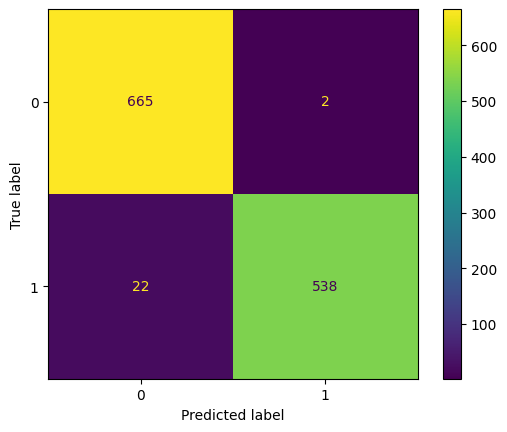

In [79]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)

# KNN is the best model with accuracy score of :0.9804